In [4]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../scripts/")
import matplotlib.pyplot as plt
import numpy as np

import filenames
from hivevo.patients import Patient

import trajectory
from activity import get_activity

# Plotting activity for all patients

In [5]:
def average_activity(patient_names, region, normalize=True, remove_one_point_traj=False, min_freq=0.2):
    for patient_name in patient_names:
        patient = Patient.load(patient_name)

        time_bins, fixed, lost, active, sum = get_activity(patient, region, False, remove_one_point_traj, min_freq)
        if patient_name == patient_names[0]:
            tot_fixed = np.array(fixed)
            tot_lost = np.array(lost)
            tot_active = np.array(active)
            tot_sum = np.array(sum)
        else:
            tot_fixed += fixed
            tot_lost += lost
            tot_active += active
            tot_sum += sum

    if normalize:
        tot_fixed = np.array(tot_fixed) / tot_sum
        tot_lost = np.array(tot_lost) / tot_sum
        tot_active = np.array(tot_active) / tot_sum
        tot_sum = np.ones_like(tot_fixed)

    return time_bins, tot_fixed, tot_lost, tot_active, tot_sum

def plot_average_activity(region, time_bins, fixed, lost, active, sum, fontsize=16):
    plt.figure(figsize=(10,8))
    plt.title(f"Average activity region {region}", fontsize=fontsize)
    plt.plot(time_bins, fixed, label="fixed")
    plt.plot(time_bins, lost, label="lost")
    plt.plot(time_bins, active, label="active")
    if sum[0] != 1:
        plt.plot(time_bins, sum, label="sum")
    plt.legend(fontsize=fontsize)
    plt.xlabel("Time [days]", fontsize=fontsize)
    plt.ylabel("# Trajectories", fontsize=fontsize)
    plt.show()

# Region env

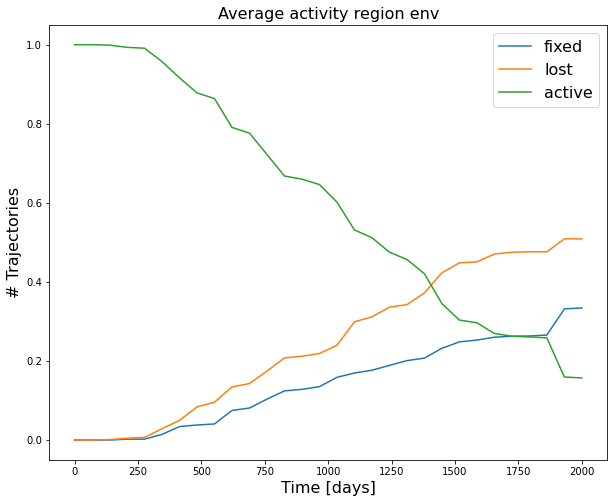

In [6]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

# Region pol

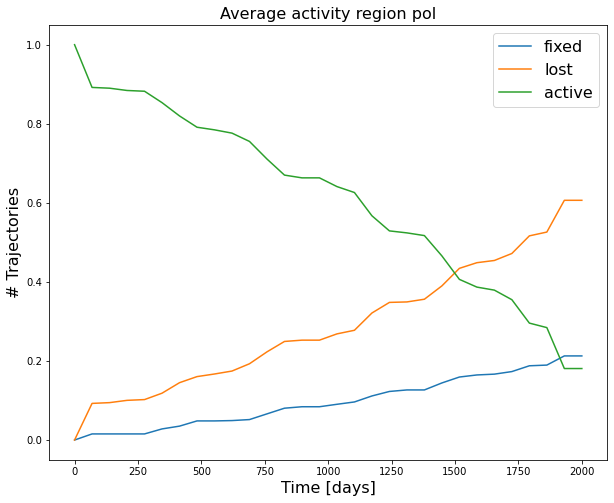

In [7]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "pol"
normalize = True
remove_one_point_traj = False

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

# Region gag

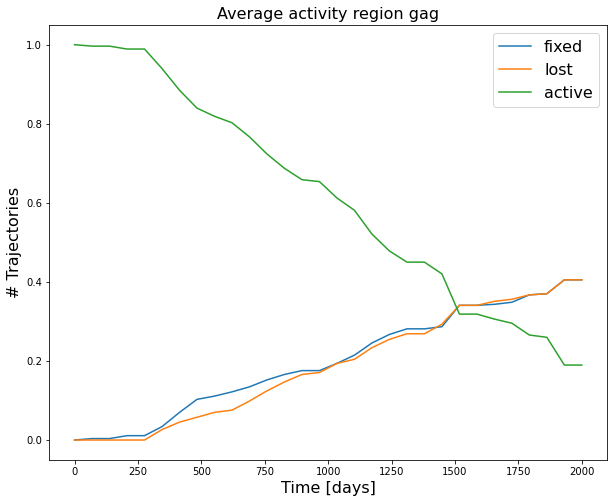

In [8]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "gag"
normalize = True
remove_one_point_traj = True

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

# Whole genome

In [ ]:
# Genomewide doesn't work anymore because its not a valid region for the get_syn_mutations function that is used
# in the create_trajectory_list
atient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "genomewide"
normalize = True
remove_one_point_traj = True

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

##################################################################
# Changing frequency range, env


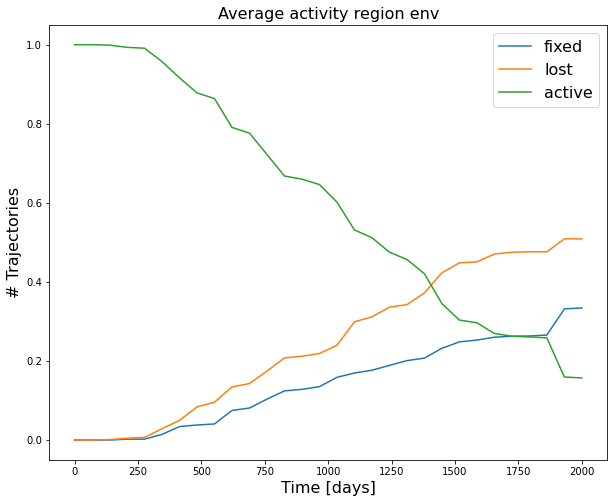

In [10]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
min_freq = 0.2

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj, min_freq)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

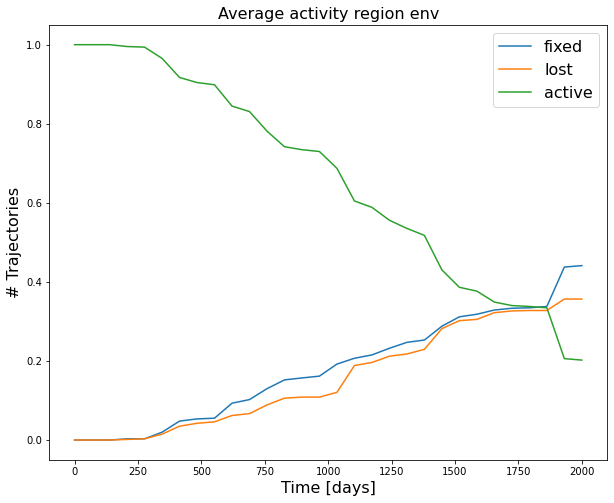

In [11]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
min_freq = 0.4

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj, min_freq)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

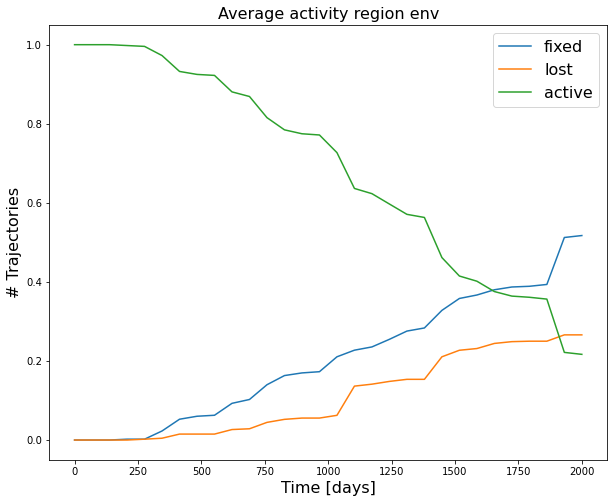

In [12]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
min_freq = 0.6

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj, min_freq)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

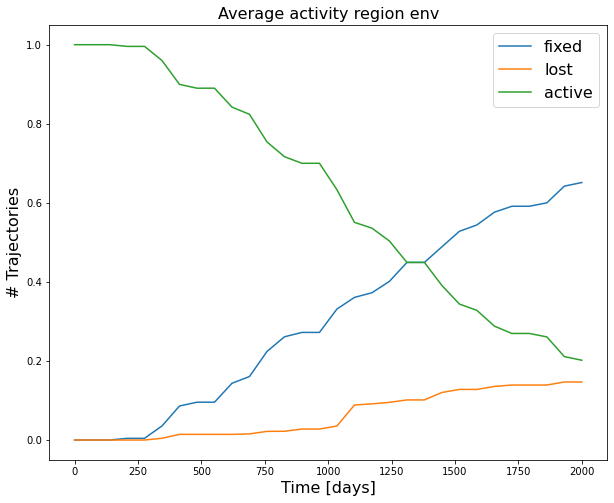

In [13]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
min_freq = 0.8

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj, min_freq)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

# Syn VS non_syn trajectories

In [14]:
def get_average_activity(trajectories, normalize=False, remove_one_point_traj=False, min_freq=0.2):
    time_bins = np.linspace(0, 2000, 30)
    filtered_traj = [traj for traj in trajectories if np.sum(traj.frequencies > min_freq, dtype=bool)]
    if remove_one_point_traj:
        filtered_traj = [traj for traj in filtered_traj if traj.t[-1] > 0]  # Remove 1 point only trajectories

    filtered_fixed = [traj for traj in filtered_traj if traj.fixation == "fixed"]
    filtered_lost = [traj for traj in filtered_traj if traj.fixation == "lost"]
    filtered_active = [traj for traj in filtered_traj if traj.fixation == "active"]
    fixed, lost, active = [], [], []

    for ii in range(len(time_bins)):
        nb_fixed = len([traj for traj in filtered_fixed if traj.t[-1] < time_bins[ii]])
        nb_lost = len([traj for traj in filtered_lost if traj.t[-1] < time_bins[ii]])
        nb_active = len([traj for traj in filtered_traj if traj.t[-1] >= time_bins[ii]])
        # not adding len([traj for traj in filtered_active if traj.t[-1] < time_bins[ii]]) because we don't know how long they stay active as they are from last timepoint

        fixed = fixed + [nb_fixed]
        lost = lost + [nb_lost]
        active = active + [nb_active]

    sum = np.array(fixed) + np.array(lost) + np.array(active)

    if normalize:
        fixed = np.array(fixed) / sum
        lost = np.array(lost) / sum
        active = np.array(active) / sum
        sum = np.ones_like(fixed)
    return time_bins, fixed, lost, active, sum

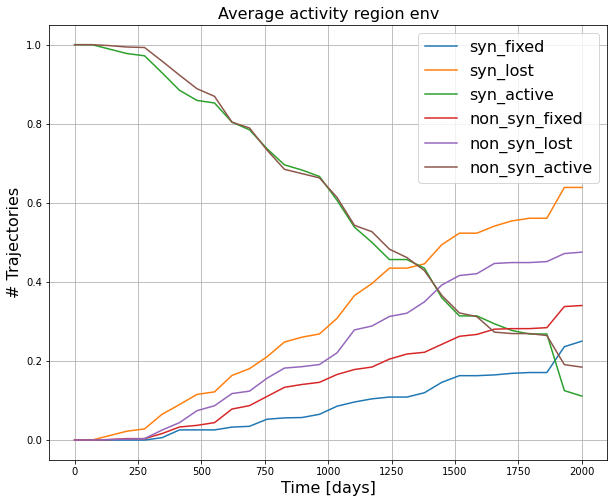

In [15]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
fontsize=16

trajectories = trajectory.create_all_patient_trajectories(region)
traj_syn = [traj for traj in trajectories if traj.synonymous == True]
traj_non_syn = [traj for traj in trajectories if traj.synonymous == False]
bins, syn_fixed, syn_lost, syn_active, syn_sum = get_average_activity(traj_syn, normalize, remove_one_point_traj)
_, non_syn_fixed, non_syn_lost, non_syn_active, non_syn_sum = get_average_activity(traj_non_syn, normalize, remove_one_point_traj)


plt.figure(figsize=(10,8))
plt.title(f"Average activity region {region}", fontsize=fontsize)
plt.plot(bins, syn_fixed, label="syn_fixed")
plt.plot(bins, syn_lost, label="syn_lost")
plt.plot(bins, syn_active, label="syn_active")
plt.plot(bins, non_syn_fixed, label="non_syn_fixed")
plt.plot(bins, non_syn_lost, label="non_syn_lost")
plt.plot(bins, non_syn_active, label="non_syn_active")
plt.legend(fontsize=fontsize)
plt.xlabel("Time [days]", fontsize=fontsize)
plt.ylabel("# Trajectories", fontsize=fontsize)
plt.grid()
plt.show()


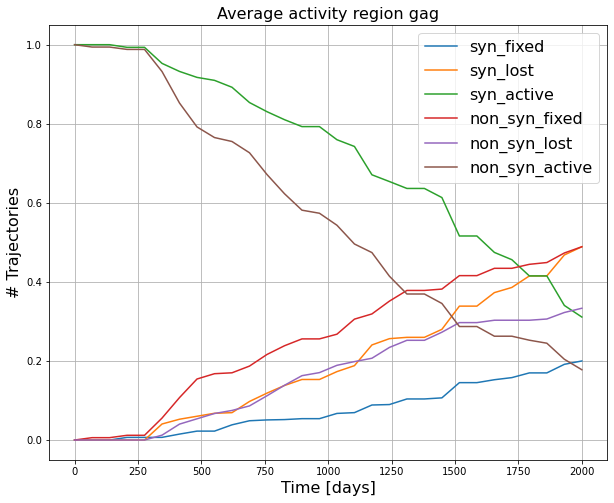

In [16]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "gag"
normalize = True
remove_one_point_traj = True
fontsize=16

trajectories = trajectory.create_all_patient_trajectories(region)
traj_syn = [traj for traj in trajectories if traj.synonymous == True]
traj_non_syn = [traj for traj in trajectories if traj.synonymous == False]
bins, syn_fixed, syn_lost, syn_active, syn_sum = get_average_activity(traj_syn, normalize, remove_one_point_traj)
_, non_syn_fixed, non_syn_lost, non_syn_active, non_syn_sum = get_average_activity(traj_non_syn, normalize, remove_one_point_traj)


plt.figure(figsize=(10,8))
plt.title(f"Average activity region {region}", fontsize=fontsize)
plt.plot(bins, syn_fixed, label="syn_fixed")
plt.plot(bins, syn_lost, label="syn_lost")
plt.plot(bins, syn_active, label="syn_active")
plt.plot(bins, non_syn_fixed, label="non_syn_fixed")
plt.plot(bins, non_syn_lost, label="non_syn_lost")
plt.plot(bins, non_syn_active, label="non_syn_active")
plt.legend(fontsize=fontsize)
plt.xlabel("Time [days]", fontsize=fontsize)
plt.ylabel("# Trajectories", fontsize=fontsize)
plt.grid()
plt.show()


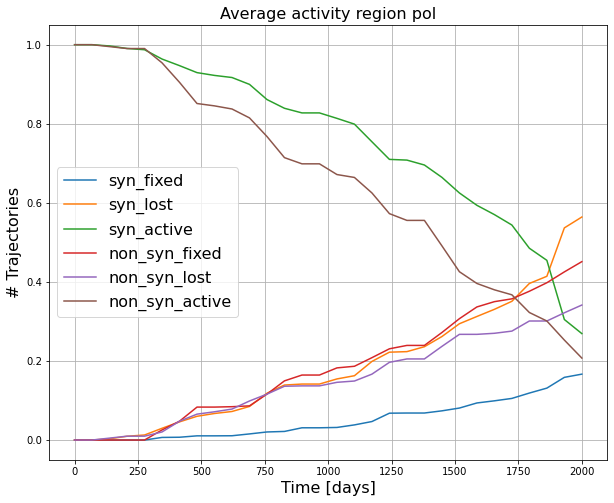

In [17]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "pol"
normalize = True
remove_one_point_traj = True
fontsize=16

trajectories = trajectory.create_all_patient_trajectories(region)
traj_syn = [traj for traj in trajectories if traj.synonymous == True]
traj_non_syn = [traj for traj in trajectories if traj.synonymous == False]
bins, syn_fixed, syn_lost, syn_active, syn_sum = get_average_activity(traj_syn, normalize, remove_one_point_traj)
_, non_syn_fixed, non_syn_lost, non_syn_active, non_syn_sum = get_average_activity(traj_non_syn, normalize, remove_one_point_traj)


plt.figure(figsize=(10,8))
plt.title(f"Average activity region {region}", fontsize=fontsize)
plt.plot(bins, syn_fixed, label="syn_fixed")
plt.plot(bins, syn_lost, label="syn_lost")
plt.plot(bins, syn_active, label="syn_active")
plt.plot(bins, non_syn_fixed, label="non_syn_fixed")
plt.plot(bins, non_syn_lost, label="non_syn_lost")
plt.plot(bins, non_syn_active, label="non_syn_active")
plt.legend(fontsize=fontsize)
plt.xlabel("Time [days]", fontsize=fontsize)
plt.ylabel("# Trajectories", fontsize=fontsize)
plt.grid()
plt.show()
